<a href="https://colab.research.google.com/github/matheussato/data-science-study/blob/main/Aula00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [100]:
notas = pd.read_csv("ratings.csv")

notas.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [101]:
notas.shape

(100836, 4)

In [102]:
notas.columns = ["usuarioId", "filmeId","nota","momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [103]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [104]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [105]:
notas['nota'].mean()

3.501556983616962

<Axes: ylabel='Frequency'>

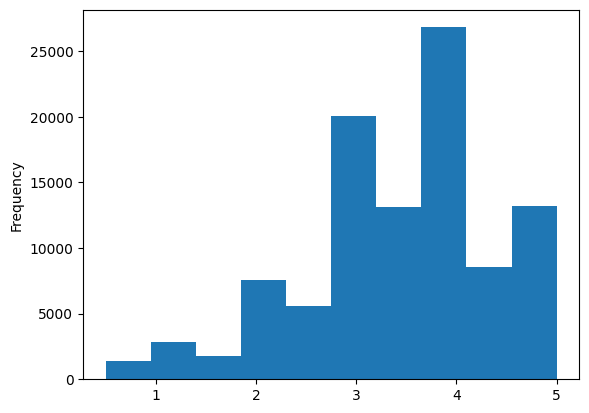

In [106]:
notas.nota.plot(kind = 'hist')

In [107]:
print('Média:',(notas.nota.mean()))
print('Mediana:',(notas.nota.median()))

Média: 3.501556983616962
Mediana: 3.5


In [108]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

## Utilizando o seaborn

<Axes: >

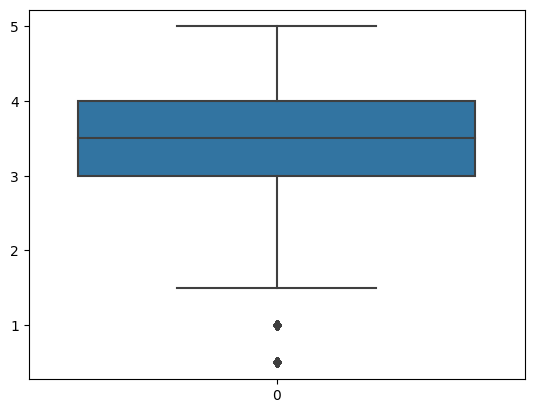

In [109]:
sns.boxplot(notas.nota)

## DataFrame de filmes

In [110]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo','generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Query para analisar notas especificas por filme

In [111]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [112]:
medias_por_filme = notas.groupby("filmeId").mean()["nota"]
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

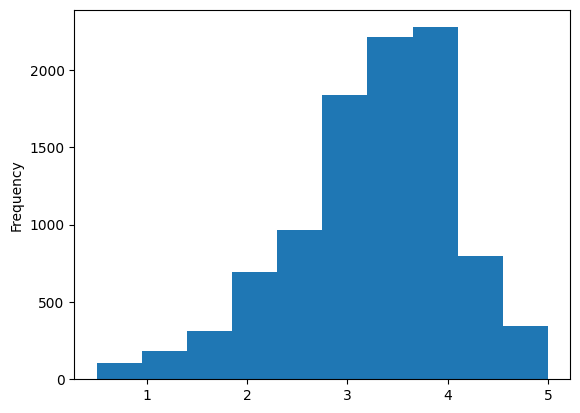

In [113]:
medias_por_filme.plot(kind='hist')

<ipython-input-115-5bf8cca2d6c7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins=10)


<Axes: xlabel='nota', ylabel='Density'>

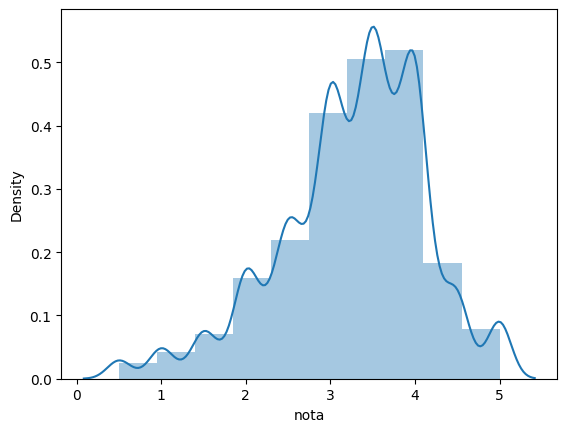

In [115]:
sns.distplot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

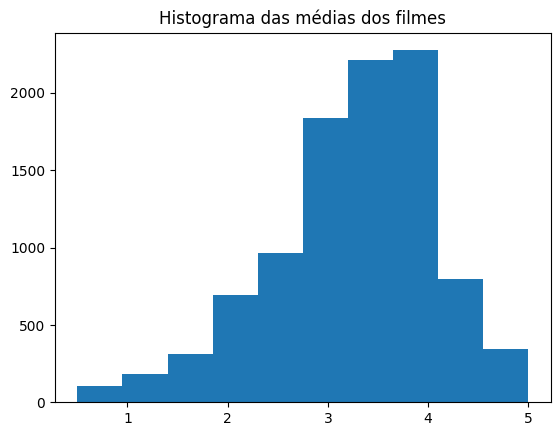

In [118]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")